**EDA and Feature Engineering**

In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import HashingEncoder

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#loading the Data Set
solar_data = pd.read_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data.csv")

In [7]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5397 non-null   int64  
 1   County            5397 non-null   object 
 2   Acres             5397 non-null   float64
 3   InstallType       5397 non-null   object 
 4   UrbanRural        5397 non-null   object 
 5   Class             5397 non-null   object 
 6   DistSub_100       5397 non-null   float64
 7   Percent_100       5397 non-null   object 
 8   Substation_100    5397 non-null   object 
 9   HIFLD_100         5397 non-null   float64
 10  DistSub_200       5397 non-null   float64
 11  Percent_200       5397 non-null   object 
 12  Substation_200    5397 non-null   object 
 13  HIFLD_200         5397 non-null   int64  
 14  DistSub_CAISO     5397 non-null   float64
 15  Percent_CAISO     5397 non-null   object 
 16  Substation_CAISO  5387 non-null   object 


In [9]:
solar_data.head(5)

,ID,County,Acres,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,...,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,1.672639,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,1.897078,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,1.275783,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,1.424286,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,0.984429,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,...,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425


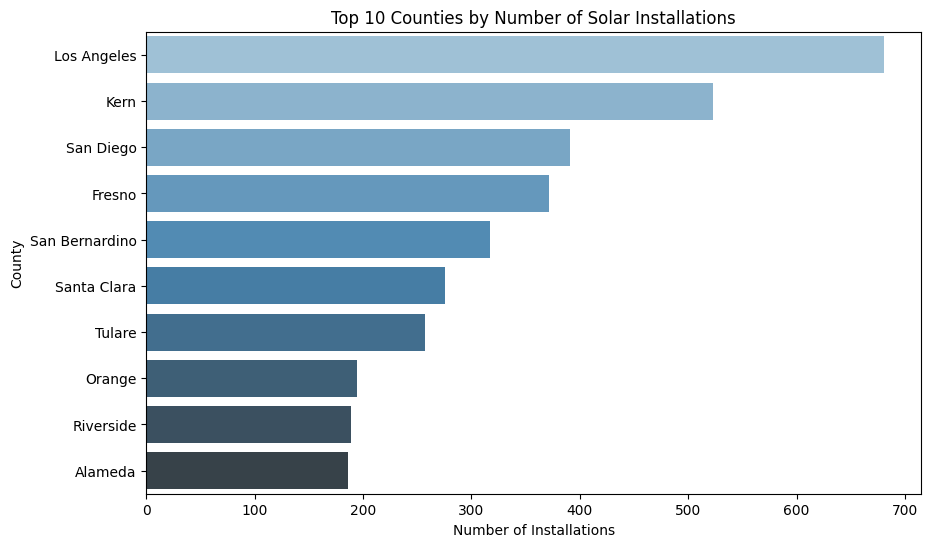

In [11]:
# Top counties with the most solar installations
# Group the data by county
county_installations = solar_data.groupby('County').size().reset_index(name='installation_count')

# Sort the data
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

# Plot the top counties with the most solar installations
plt.figure(figsize=(10, 6))

sns.barplot(x='installation_count', y='County', data=county_installations.head(10), palette='Blues_d', legend=False)

plt.title('Top 10 Counties by Number of Solar Installations')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.show()


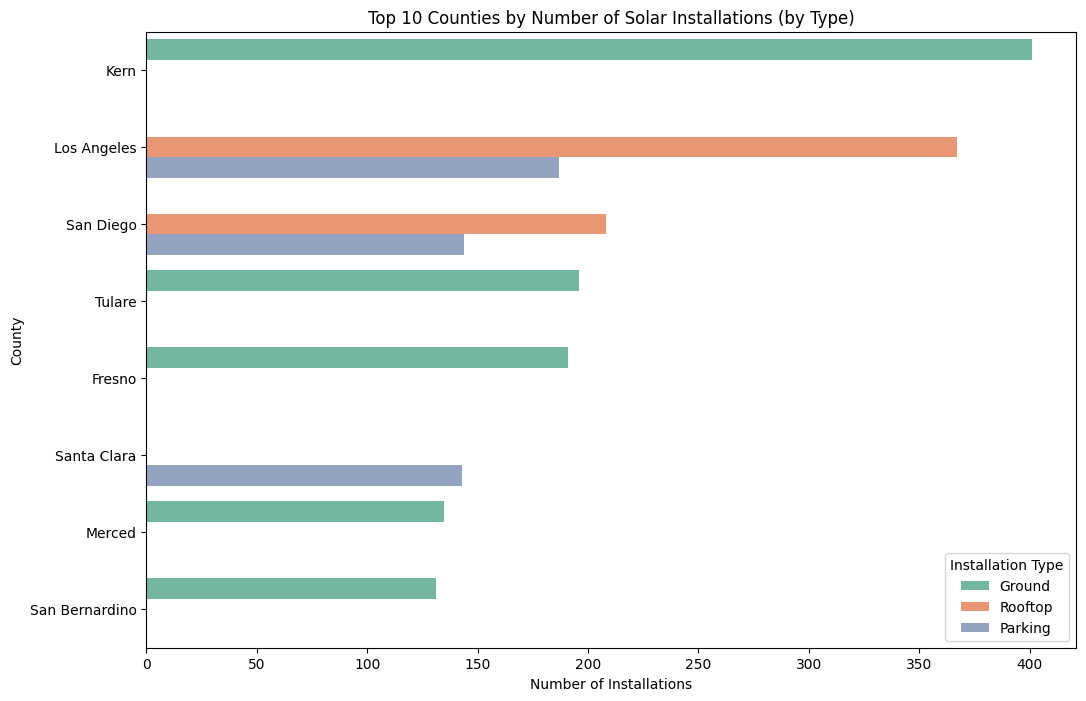

In [12]:
# Top counties with the most solar installations by install type
# Group the data by county and installation type
county_installations = solar_data.groupby(['County', 'InstallType']).size().reset_index(name='installation_count')

# Sort the data 
county_installations = county_installations.sort_values(by='installation_count', ascending=False)

plt.figure(figsize=(12, 8))

# Use of 'InstallType' as the hue for differentiation
sns.barplot(x='installation_count', y='County', hue='InstallType', data=county_installations.head(10), palette='Set2')

plt.title('Top 10 Counties by Number of Solar Installations (by Type)')
plt.xlabel('Number of Installations')
plt.ylabel('County')
plt.legend(title='Installation Type')
plt.show()


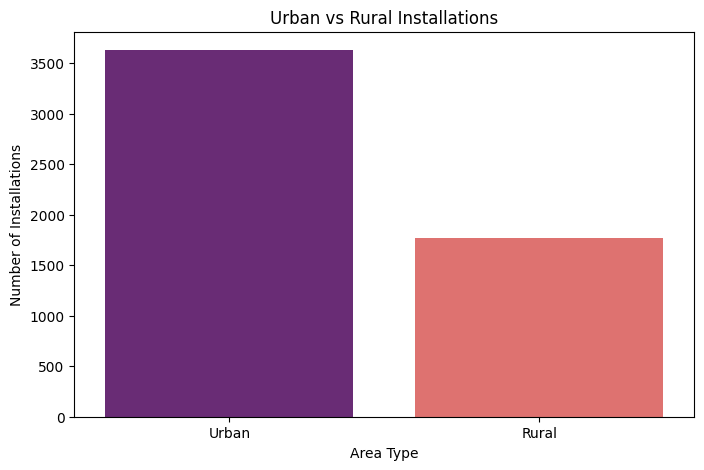

In [13]:
# Plot for Urban vs Rural Installations
plt.figure(figsize=(8, 5))
sns.countplot(x='UrbanRural', data=solar_data, palette='magma')
plt.title('Urban vs Rural Installations')
plt.xlabel('Area Type')
plt.ylabel('Number of Installations')
plt.show()


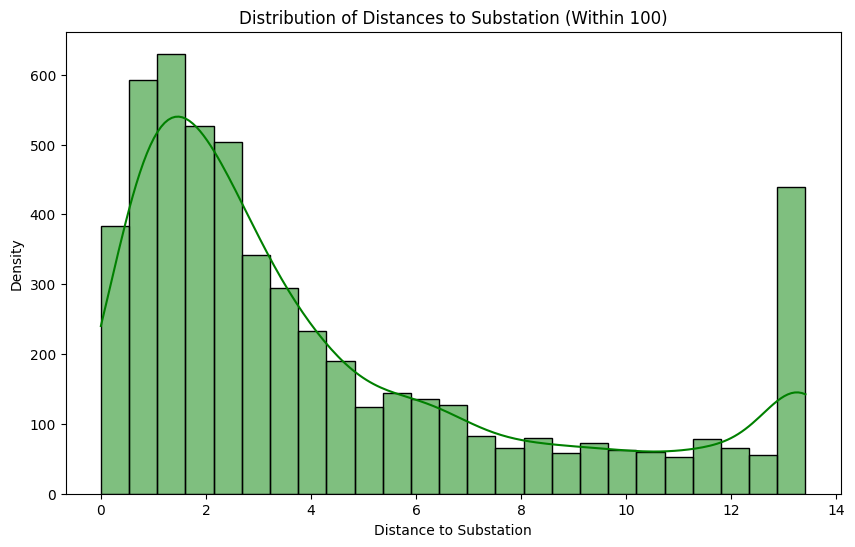

In [14]:
# Plot for Distribution of Distances to Substation 
plt.figure(figsize=(10, 6))
sns.histplot(solar_data['DistSub_100'], kde=True, color='green')
plt.title('Distribution of Distances to Substation (Within 100)')
plt.xlabel('Distance to Substation')
plt.ylabel('Density')
plt.show()


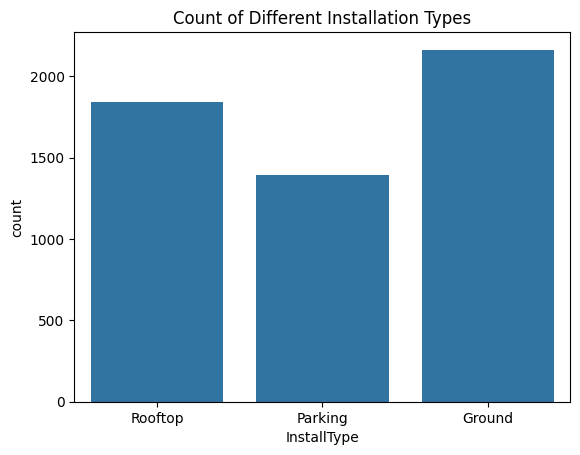

In [16]:
# Plot for installation types
sns.countplot(x='InstallType', data=solar_data)
plt.title('Count of Different Installation Types')
plt.show()


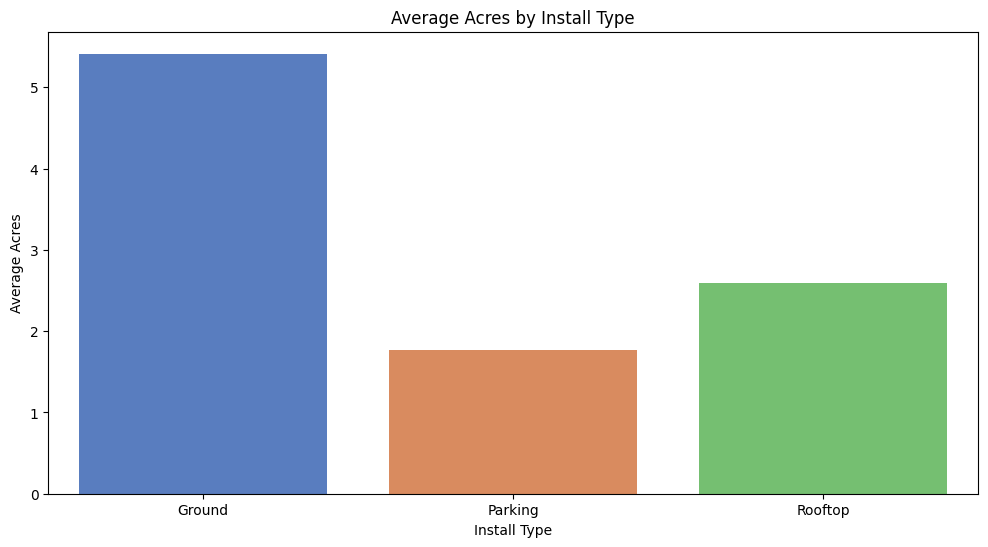

In [17]:
# Plot for Acres by Install Type
# Calculate mean acres by installation type
mean_acres = solar_data.groupby('InstallType')['Acres'].mean().reset_index()

# Bar plot of mean Acres by Install Type
plt.figure(figsize=(12, 6))
sns.barplot(x='InstallType', y='Acres', data=mean_acres, palette='muted')
plt.title('Average Acres by Install Type')
plt.ylabel('Average Acres')
plt.xlabel('Install Type')
plt.show()


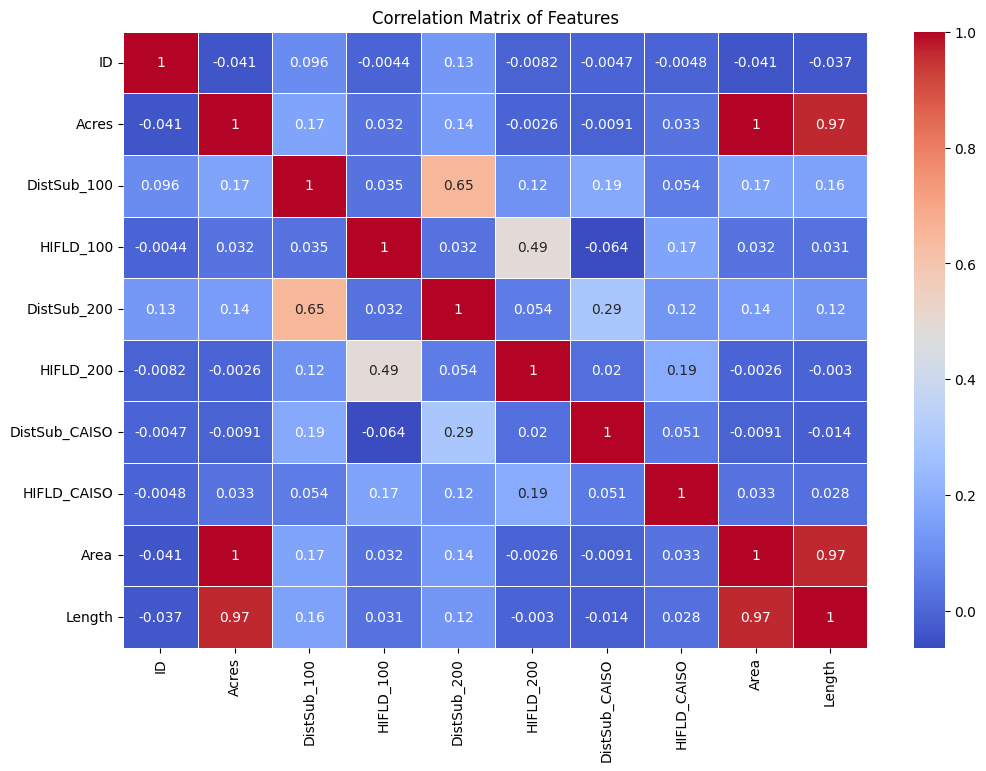

In [19]:
# Correlation Matrix
# Select only numeric columns for the correlation matrix
numeric_solar_data = solar_data.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_solar_data.corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


Findings from Correlation Matrix: 
1. Acres and Area indicates perfect positive correlation of 1, suggesting these variables are the same fields but with different units.
2. Acres and Length: These two features are highly correlated(0.97), suggesting that they are closely related.
3. DistSub_100 and DistSub_200 show a moderate positive correlation of 0.65, indicating the distance to a substation at 100 and 200 units behaves similarly.
4. DistSub_CAISO and DistSub_200 are quite low in terms of their correlation, equating to 0.29.
5. Multiple pairs of variables show close to 0 correlation like "ID" and most of the rest of the features, with values close to zero, which implies negligible or zero linear relationship between pairs. 

Since, Area and Acres are perfectly correlated, we can say that both the features bring redundacy in the dataset, and it would be better to drop one of them for the better performance and accuracy.
    

In [23]:
# Drop Acres as it is perfectly correlated with Area
solar_data = solar_data.drop(columns=['Acres'])

In [24]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,DistSub_200,Percent_200,Substation_200,HIFLD_200,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length
0,1,Alameda,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,2.272283,0-25,Los Esteros,310258,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336
1,2,Alameda,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,2.392816,0-25,Los Esteros,310258,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878
2,3,Alameda,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,2.537298,0-25,Los Esteros,310258,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263
3,4,Alameda,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,2.626699,0-25,Los Esteros,310258,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846
4,5,Alameda,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,2.728629,0-25,Los Esteros,310258,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425


**Feature Engineering**

In [28]:
#Creating bins for DistSub_100, DistSub_200, and DistSub_CAISO can simplify distance impacts and make it easier to capture proximity categories.
solar_data['DistSub_100_binned'] = pd.cut(solar_data['DistSub_100'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])
solar_data['DistSub_200_binned'] = pd.cut(solar_data['DistSub_200'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])
solar_data['DistSub_CAISO_binned'] = pd.cut(solar_data['DistSub_CAISO'], bins=[0, 1, 5, 10, 20, float('inf')], labels=['very close', 'close', 'moderate', 'far', 'very far'])


In [29]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,DistSub_100,Percent_100,Substation_100,HIFLD_100,DistSub_200,...,DistSub_CAISO,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length,DistSub_100_binned,DistSub_200_binned,DistSub_CAISO_binned
0,1,Alameda,Rooftop,Urban,Rooftop - Urban,0.162732,0-25,Dixon Landing,309200.0,2.272283,...,2.272283,0-25,Los Esteros,310258,Within,6768.954679,365.801336,very close,close,close
1,2,Alameda,Rooftop,Urban,Rooftop - Urban,0.226728,0-25,Dixon Landing,309200.0,2.392816,...,2.392816,0-25,Los Esteros,310258,Within,7677.228982,366.909878,very close,close,close
2,3,Alameda,Rooftop,Urban,Rooftop - Urban,0.426104,0-25,Dixon Landing,309200.0,2.537298,...,2.537298,0-25,Los Esteros,310258,Within,5162.935990,290.576263,very close,close,close
3,4,Alameda,Rooftop,Urban,Rooftop - Urban,0.491306,0-25,Dixon Landing,309200.0,2.626699,...,2.626699,0-25,Los Esteros,310258,Within,5763.905754,344.705846,very close,close,close
4,5,Alameda,Rooftop,Urban,Rooftop - Urban,0.795822,0-25,Dixon Landing,309200.0,2.728629,...,2.728629,25-50,Los Esteros,310258,Within,3983.859693,283.968425,very close,close,close


In [30]:
#Drooping the DistSub fields, as the above new three binned features are created from these features
solar_data = solar_data.drop(columns=['DistSub_100','DistSub_200','DistSub_CAISO'])

In [32]:
#Lable encoding the target 'InstallType' feature
label_encoder = LabelEncoder()
solar_data['InstallType'] = label_encoder.fit_transform(solar_data['InstallType'])

In [33]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,Percent_100,Substation_100,HIFLD_100,Percent_200,Substation_200,HIFLD_200,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length,DistSub_100_binned,DistSub_200_binned,DistSub_CAISO_binned
0,1,Alameda,2,Urban,Rooftop - Urban,0-25,Dixon Landing,309200.0,0-25,Los Esteros,310258,0-25,Los Esteros,310258,Within,6768.954679,365.801336,very close,close,close
1,2,Alameda,2,Urban,Rooftop - Urban,0-25,Dixon Landing,309200.0,0-25,Los Esteros,310258,0-25,Los Esteros,310258,Within,7677.228982,366.909878,very close,close,close
2,3,Alameda,2,Urban,Rooftop - Urban,0-25,Dixon Landing,309200.0,0-25,Los Esteros,310258,0-25,Los Esteros,310258,Within,5162.935990,290.576263,very close,close,close
3,4,Alameda,2,Urban,Rooftop - Urban,0-25,Dixon Landing,309200.0,0-25,Los Esteros,310258,0-25,Los Esteros,310258,Within,5763.905754,344.705846,very close,close,close
4,5,Alameda,2,Urban,Rooftop - Urban,0-25,Dixon Landing,309200.0,0-25,Los Esteros,310258,25-50,Los Esteros,310258,Within,3983.859693,283.968425,very close,close,close


In [34]:
# Separate numerical and categorical features
numerical_features = solar_data.select_dtypes(include=['int64', 'float64']).columns.drop('ID','InstallType').tolist()
categorical_features = solar_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['HIFLD_100', 'HIFLD_200', 'HIFLD_CAISO', 'Area', 'Length']
Categorical Features: ['County', 'UrbanRural', 'Class', 'Percent_100', 'Substation_100', 'Percent_200', 'Substation_200', 'Percent_CAISO', 'Substation_CAISO', 'SolarTech', 'DistSub_100_binned', 'DistSub_200_binned', 'DistSub_CAISO_binned']


**Hash Encoding to the categorical features**

In [39]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [46]:
hash_encoder = HashingEncoder(cols=categorical_features, n_components=13)  # 13-bit hash
solar_data[categorical_features] = hash_encoder.fit_transform(solar_data[categorical_features])

In [47]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,Percent_100,Substation_100,HIFLD_100,Percent_200,Substation_200,HIFLD_200,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length,DistSub_100_binned,DistSub_200_binned,DistSub_CAISO_binned
0,1,3,2,0,0,0,0,309200.0,0,2,310258,3,0,310258,0,6768.954679,365.801336,2,3,0
1,2,3,2,0,0,0,0,309200.0,0,2,310258,3,0,310258,0,7677.228982,366.909878,2,3,0
2,3,3,2,0,0,0,0,309200.0,0,2,310258,3,0,310258,0,5162.935990,290.576263,2,3,0
3,4,3,2,0,0,0,0,309200.0,0,2,310258,3,0,310258,0,5763.905754,344.705846,2,3,0
4,5,2,2,0,0,0,0,309200.0,0,2,310258,3,0,310258,1,3983.859693,283.968425,2,3,0


**Scaling: StandardScaler**

Scaling the numerical variables so that they have a mean of 0 and a standard deviation of 1

In [49]:
scaler = StandardScaler()

solar_data[numerical_features] = scaler.fit_transform(solar_data[numerical_features])

In [50]:
solar_data.head()

,ID,County,InstallType,UrbanRural,Class,Percent_100,Substation_100,HIFLD_100,Percent_200,Substation_200,HIFLD_200,Percent_CAISO,Substation_CAISO,HIFLD_CAISO,SolarTech,Area,Length,DistSub_100_binned,DistSub_200_binned,DistSub_CAISO_binned
0,1,3,2,0,0,0,0,1.078414,0,2,1.294544,3,0,1.589278,0,-0.534259,-0.455304,2,3,0
1,2,3,2,0,0,0,0,1.078414,0,2,1.294544,3,0,1.589278,0,-0.469035,-0.451893,2,3,0
2,3,3,2,0,0,0,0,1.078414,0,2,1.294544,3,0,1.589278,0,-0.649590,-0.686802,2,3,0
3,4,3,2,0,0,0,0,1.078414,0,2,1.294544,3,0,1.589278,0,-0.606433,-0.520224,2,3,0
4,5,2,2,0,0,0,0,1.078414,0,2,1.294544,3,0,1.589278,1,-0.734261,-0.707137,2,3,0


In [51]:
solar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5397 entries, 0 to 5396
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5397 non-null   int64  
 1   County                5397 non-null   int32  
 2   InstallType           5397 non-null   int32  
 3   UrbanRural            5397 non-null   int32  
 4   Class                 5397 non-null   int32  
 5   Percent_100           5397 non-null   int32  
 6   Substation_100        5397 non-null   int32  
 7   HIFLD_100             5397 non-null   float64
 8   Percent_200           5397 non-null   int32  
 9   Substation_200        5397 non-null   int32  
 10  HIFLD_200             5397 non-null   float64
 11  Percent_CAISO         5397 non-null   int32  
 12  Substation_CAISO      5397 non-null   int32  
 13  HIFLD_CAISO           5397 non-null   float64
 14  SolarTech             5397 non-null   int32  
 15  Area                 

In [58]:
solar_data.to_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data_transformed18.csv", index=False)